In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.models import resnet50

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import random
from tqdm import tqdm
import pickle

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 471kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.83MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.6MB/s]


Dataset: 44367 EEG samples, 60000 MNIST images
EEG shape: (44367, 14, 32, 1)
EEG labels shape: (44367, 10)
Starting training with MNIST dataset...


Epoch 1/50: 100%|██████████| 694/694 [00:41<00:00, 16.60it/s, Cont_Loss=4.6577, G_Loss=4.1129, D_Loss=0.7960]


Epoch 1: Contrastive_Loss = 4.6577, G_Loss = 4.1129, D_Loss = 0.7960


Epoch 2/50: 100%|██████████| 694/694 [00:40<00:00, 17.19it/s, Cont_Loss=4.6572, G_Loss=4.3974, D_Loss=0.8674]


Epoch 2: Contrastive_Loss = 4.6572, G_Loss = 4.3974, D_Loss = 0.8674


Epoch 3/50: 100%|██████████| 694/694 [00:40<00:00, 17.13it/s, Cont_Loss=4.6569, G_Loss=4.3631, D_Loss=0.8985]


Epoch 3: Contrastive_Loss = 4.6569, G_Loss = 4.3631, D_Loss = 0.8985


Epoch 4/50: 100%|██████████| 694/694 [00:40<00:00, 17.04it/s, Cont_Loss=4.6570, G_Loss=4.4211, D_Loss=0.9028]


Epoch 4: Contrastive_Loss = 4.6570, G_Loss = 4.4211, D_Loss = 0.9028


Epoch 5/50: 100%|██████████| 694/694 [00:40<00:00, 17.10it/s, Cont_Loss=4.6570, G_Loss=4.3576, D_Loss=0.9002]


Epoch 5: Contrastive_Loss = 4.6570, G_Loss = 4.3576, D_Loss = 0.9002


Epoch 6/50: 100%|██████████| 694/694 [00:40<00:00, 17.09it/s, Cont_Loss=4.6569, G_Loss=4.3620, D_Loss=0.9076]


Epoch 6: Contrastive_Loss = 4.6569, G_Loss = 4.3620, D_Loss = 0.9076


Epoch 7/50: 100%|██████████| 694/694 [00:40<00:00, 17.15it/s, Cont_Loss=4.6568, G_Loss=4.3362, D_Loss=0.9130]


Epoch 7: Contrastive_Loss = 4.6568, G_Loss = 4.3362, D_Loss = 0.9130


Epoch 8/50: 100%|██████████| 694/694 [00:40<00:00, 17.08it/s, Cont_Loss=4.6570, G_Loss=4.3805, D_Loss=0.9107]


Epoch 8: Contrastive_Loss = 4.6570, G_Loss = 4.3805, D_Loss = 0.9107


Epoch 9/50: 100%|██████████| 694/694 [00:40<00:00, 17.14it/s, Cont_Loss=4.6568, G_Loss=4.3738, D_Loss=0.9131]


Epoch 9: Contrastive_Loss = 4.6568, G_Loss = 4.3738, D_Loss = 0.9131


Epoch 10/50: 100%|██████████| 694/694 [00:40<00:00, 17.09it/s, Cont_Loss=4.6569, G_Loss=4.4623, D_Loss=0.9122]


Epoch 10: Contrastive_Loss = 4.6569, G_Loss = 4.4623, D_Loss = 0.9122


Epoch 11/50: 100%|██████████| 694/694 [00:40<00:00, 17.09it/s, Cont_Loss=4.6569, G_Loss=4.4866, D_Loss=0.8975]


Epoch 11: Contrastive_Loss = 4.6569, G_Loss = 4.4866, D_Loss = 0.8975


Epoch 12/50: 100%|██████████| 694/694 [00:40<00:00, 17.04it/s, Cont_Loss=4.6569, G_Loss=4.4510, D_Loss=0.8821]


Epoch 12: Contrastive_Loss = 4.6569, G_Loss = 4.4510, D_Loss = 0.8821


Epoch 13/50: 100%|██████████| 694/694 [00:40<00:00, 17.04it/s, Cont_Loss=4.6568, G_Loss=4.4414, D_Loss=0.8883]


Epoch 13: Contrastive_Loss = 4.6568, G_Loss = 4.4414, D_Loss = 0.8883


Epoch 14/50: 100%|██████████| 694/694 [00:40<00:00, 17.08it/s, Cont_Loss=4.6569, G_Loss=4.4725, D_Loss=0.8721]


Epoch 14: Contrastive_Loss = 4.6569, G_Loss = 4.4725, D_Loss = 0.8721


Epoch 15/50: 100%|██████████| 694/694 [00:40<00:00, 16.97it/s, Cont_Loss=4.6568, G_Loss=4.5775, D_Loss=0.8618]


Epoch 15: Contrastive_Loss = 4.6568, G_Loss = 4.5775, D_Loss = 0.8618


Epoch 16/50: 100%|██████████| 694/694 [00:40<00:00, 17.14it/s, Cont_Loss=4.6568, G_Loss=4.5802, D_Loss=0.8487]


Epoch 16: Contrastive_Loss = 4.6568, G_Loss = 4.5802, D_Loss = 0.8487


Epoch 17/50: 100%|██████████| 694/694 [00:40<00:00, 17.05it/s, Cont_Loss=4.6569, G_Loss=4.5938, D_Loss=0.8352]


Epoch 17: Contrastive_Loss = 4.6569, G_Loss = 4.5938, D_Loss = 0.8352


Epoch 18/50: 100%|██████████| 694/694 [00:40<00:00, 17.03it/s, Cont_Loss=4.6568, G_Loss=4.6221, D_Loss=0.8397]


Epoch 18: Contrastive_Loss = 4.6568, G_Loss = 4.6221, D_Loss = 0.8397


Epoch 19/50: 100%|██████████| 694/694 [00:40<00:00, 17.03it/s, Cont_Loss=4.6568, G_Loss=4.6730, D_Loss=0.8292]


Epoch 19: Contrastive_Loss = 4.6568, G_Loss = 4.6730, D_Loss = 0.8292


Epoch 20/50: 100%|██████████| 694/694 [00:40<00:00, 17.12it/s, Cont_Loss=4.6569, G_Loss=4.6563, D_Loss=0.8290]


Epoch 20: Contrastive_Loss = 4.6569, G_Loss = 4.6563, D_Loss = 0.8290


Epoch 21/50: 100%|██████████| 694/694 [00:40<00:00, 17.02it/s, Cont_Loss=4.6568, G_Loss=4.6468, D_Loss=0.8200]


Epoch 21: Contrastive_Loss = 4.6568, G_Loss = 4.6468, D_Loss = 0.8200


Epoch 22/50: 100%|██████████| 694/694 [00:40<00:00, 17.07it/s, Cont_Loss=4.6568, G_Loss=4.7322, D_Loss=0.8173]


Epoch 22: Contrastive_Loss = 4.6568, G_Loss = 4.7322, D_Loss = 0.8173


Epoch 23/50: 100%|██████████| 694/694 [00:40<00:00, 17.09it/s, Cont_Loss=4.6569, G_Loss=4.7626, D_Loss=0.8105]


Epoch 23: Contrastive_Loss = 4.6569, G_Loss = 4.7626, D_Loss = 0.8105


Epoch 24/50: 100%|██████████| 694/694 [00:40<00:00, 17.02it/s, Cont_Loss=4.6568, G_Loss=4.8181, D_Loss=0.7890]


Epoch 24: Contrastive_Loss = 4.6568, G_Loss = 4.8181, D_Loss = 0.7890


Epoch 25/50: 100%|██████████| 694/694 [00:40<00:00, 16.95it/s, Cont_Loss=4.6568, G_Loss=4.7697, D_Loss=0.7891]


Epoch 25: Contrastive_Loss = 4.6568, G_Loss = 4.7697, D_Loss = 0.7891


Epoch 26/50: 100%|██████████| 694/694 [00:40<00:00, 16.97it/s, Cont_Loss=4.6568, G_Loss=4.8580, D_Loss=0.7837]


Epoch 26: Contrastive_Loss = 4.6568, G_Loss = 4.8580, D_Loss = 0.7837


Epoch 27/50: 100%|██████████| 694/694 [00:40<00:00, 16.94it/s, Cont_Loss=4.6569, G_Loss=4.8456, D_Loss=0.7757]


Epoch 27: Contrastive_Loss = 4.6569, G_Loss = 4.8456, D_Loss = 0.7757


Epoch 28/50: 100%|██████████| 694/694 [00:40<00:00, 17.00it/s, Cont_Loss=4.6568, G_Loss=4.8775, D_Loss=0.7736]


Epoch 28: Contrastive_Loss = 4.6568, G_Loss = 4.8775, D_Loss = 0.7736


Epoch 29/50: 100%|██████████| 694/694 [00:40<00:00, 17.07it/s, Cont_Loss=4.6568, G_Loss=4.8800, D_Loss=0.7624]


Epoch 29: Contrastive_Loss = 4.6568, G_Loss = 4.8800, D_Loss = 0.7624


Epoch 30/50: 100%|██████████| 694/694 [00:40<00:00, 17.07it/s, Cont_Loss=4.6569, G_Loss=4.8705, D_Loss=0.7489]


Epoch 30: Contrastive_Loss = 4.6569, G_Loss = 4.8705, D_Loss = 0.7489


Epoch 31/50: 100%|██████████| 694/694 [00:40<00:00, 17.02it/s, Cont_Loss=4.6568, G_Loss=4.9006, D_Loss=0.7548]


Epoch 31: Contrastive_Loss = 4.6568, G_Loss = 4.9006, D_Loss = 0.7548


Epoch 32/50: 100%|██████████| 694/694 [00:40<00:00, 17.06it/s, Cont_Loss=4.6568, G_Loss=4.9142, D_Loss=0.7449]


Epoch 32: Contrastive_Loss = 4.6568, G_Loss = 4.9142, D_Loss = 0.7449


Epoch 33/50: 100%|██████████| 694/694 [00:40<00:00, 16.99it/s, Cont_Loss=4.6567, G_Loss=4.9210, D_Loss=0.7435]


Epoch 33: Contrastive_Loss = 4.6567, G_Loss = 4.9210, D_Loss = 0.7435


Epoch 34/50: 100%|██████████| 694/694 [00:40<00:00, 17.02it/s, Cont_Loss=4.6568, G_Loss=4.9301, D_Loss=0.7378]


Epoch 34: Contrastive_Loss = 4.6568, G_Loss = 4.9301, D_Loss = 0.7378


Epoch 35/50: 100%|██████████| 694/694 [00:40<00:00, 17.02it/s, Cont_Loss=4.6568, G_Loss=4.9172, D_Loss=0.7424]


Epoch 35: Contrastive_Loss = 4.6568, G_Loss = 4.9172, D_Loss = 0.7424


Epoch 36/50: 100%|██████████| 694/694 [00:40<00:00, 16.94it/s, Cont_Loss=4.6567, G_Loss=4.9716, D_Loss=0.7255]


Epoch 36: Contrastive_Loss = 4.6567, G_Loss = 4.9716, D_Loss = 0.7255


Epoch 37/50: 100%|██████████| 694/694 [00:40<00:00, 17.06it/s, Cont_Loss=4.6569, G_Loss=4.9722, D_Loss=0.7219]


Epoch 37: Contrastive_Loss = 4.6569, G_Loss = 4.9722, D_Loss = 0.7219


Epoch 38/50: 100%|██████████| 694/694 [00:41<00:00, 16.89it/s, Cont_Loss=4.6568, G_Loss=5.0305, D_Loss=0.7214]


Epoch 38: Contrastive_Loss = 4.6568, G_Loss = 5.0305, D_Loss = 0.7214


Epoch 39/50: 100%|██████████| 694/694 [00:40<00:00, 16.95it/s, Cont_Loss=4.6568, G_Loss=5.0579, D_Loss=0.7104]


Epoch 39: Contrastive_Loss = 4.6568, G_Loss = 5.0579, D_Loss = 0.7104


Epoch 40/50: 100%|██████████| 694/694 [00:40<00:00, 17.00it/s, Cont_Loss=4.6568, G_Loss=5.0612, D_Loss=0.7092]


Epoch 40: Contrastive_Loss = 4.6568, G_Loss = 5.0612, D_Loss = 0.7092


Epoch 41/50: 100%|██████████| 694/694 [00:40<00:00, 16.98it/s, Cont_Loss=4.6568, G_Loss=5.0781, D_Loss=0.6979]


Epoch 41: Contrastive_Loss = 4.6568, G_Loss = 5.0781, D_Loss = 0.6979


Epoch 42/50: 100%|██████████| 694/694 [00:40<00:00, 16.94it/s, Cont_Loss=4.6568, G_Loss=5.1042, D_Loss=0.6937]


Epoch 42: Contrastive_Loss = 4.6568, G_Loss = 5.1042, D_Loss = 0.6937


Epoch 43/50: 100%|██████████| 694/694 [00:41<00:00, 16.86it/s, Cont_Loss=4.6568, G_Loss=5.1177, D_Loss=0.6960]


Epoch 43: Contrastive_Loss = 4.6568, G_Loss = 5.1177, D_Loss = 0.6960


Epoch 44/50: 100%|██████████| 694/694 [00:40<00:00, 16.95it/s, Cont_Loss=4.6568, G_Loss=5.1399, D_Loss=0.6905]


Epoch 44: Contrastive_Loss = 4.6568, G_Loss = 5.1399, D_Loss = 0.6905


Epoch 45/50: 100%|██████████| 694/694 [00:40<00:00, 17.03it/s, Cont_Loss=4.6568, G_Loss=5.1608, D_Loss=0.6910]


Epoch 45: Contrastive_Loss = 4.6568, G_Loss = 5.1608, D_Loss = 0.6910


Epoch 46/50: 100%|██████████| 694/694 [00:41<00:00, 16.83it/s, Cont_Loss=4.6568, G_Loss=5.1461, D_Loss=0.6926]


Epoch 46: Contrastive_Loss = 4.6568, G_Loss = 5.1461, D_Loss = 0.6926


Epoch 47/50: 100%|██████████| 694/694 [00:41<00:00, 16.90it/s, Cont_Loss=4.6568, G_Loss=5.1630, D_Loss=0.6707]


Epoch 47: Contrastive_Loss = 4.6568, G_Loss = 5.1630, D_Loss = 0.6707


Epoch 48/50: 100%|██████████| 694/694 [00:41<00:00, 16.90it/s, Cont_Loss=4.6568, G_Loss=5.1603, D_Loss=0.6723]


Epoch 48: Contrastive_Loss = 4.6568, G_Loss = 5.1603, D_Loss = 0.6723


Epoch 49/50: 100%|██████████| 694/694 [00:40<00:00, 16.95it/s, Cont_Loss=4.6568, G_Loss=5.1168, D_Loss=0.6710]


Epoch 49: Contrastive_Loss = 4.6568, G_Loss = 5.1168, D_Loss = 0.6710


Epoch 50/50: 100%|██████████| 694/694 [00:41<00:00, 16.69it/s, Cont_Loss=4.6568, G_Loss=5.2408, D_Loss=0.6656]


Epoch 50: Contrastive_Loss = 4.6568, G_Loss = 5.2408, D_Loss = 0.6656


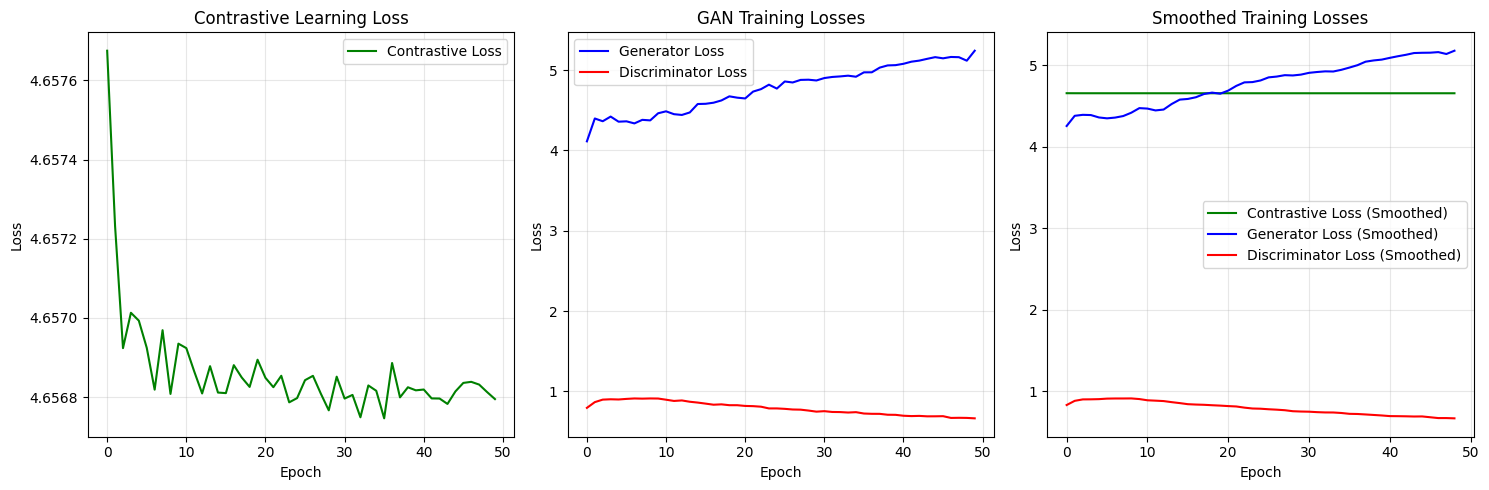

Training history saved as training_history.png
Dataset: 44367 EEG samples, 60000 MNIST images
EEG shape: (44367, 14, 32, 1)
EEG labels shape: (44367, 10)


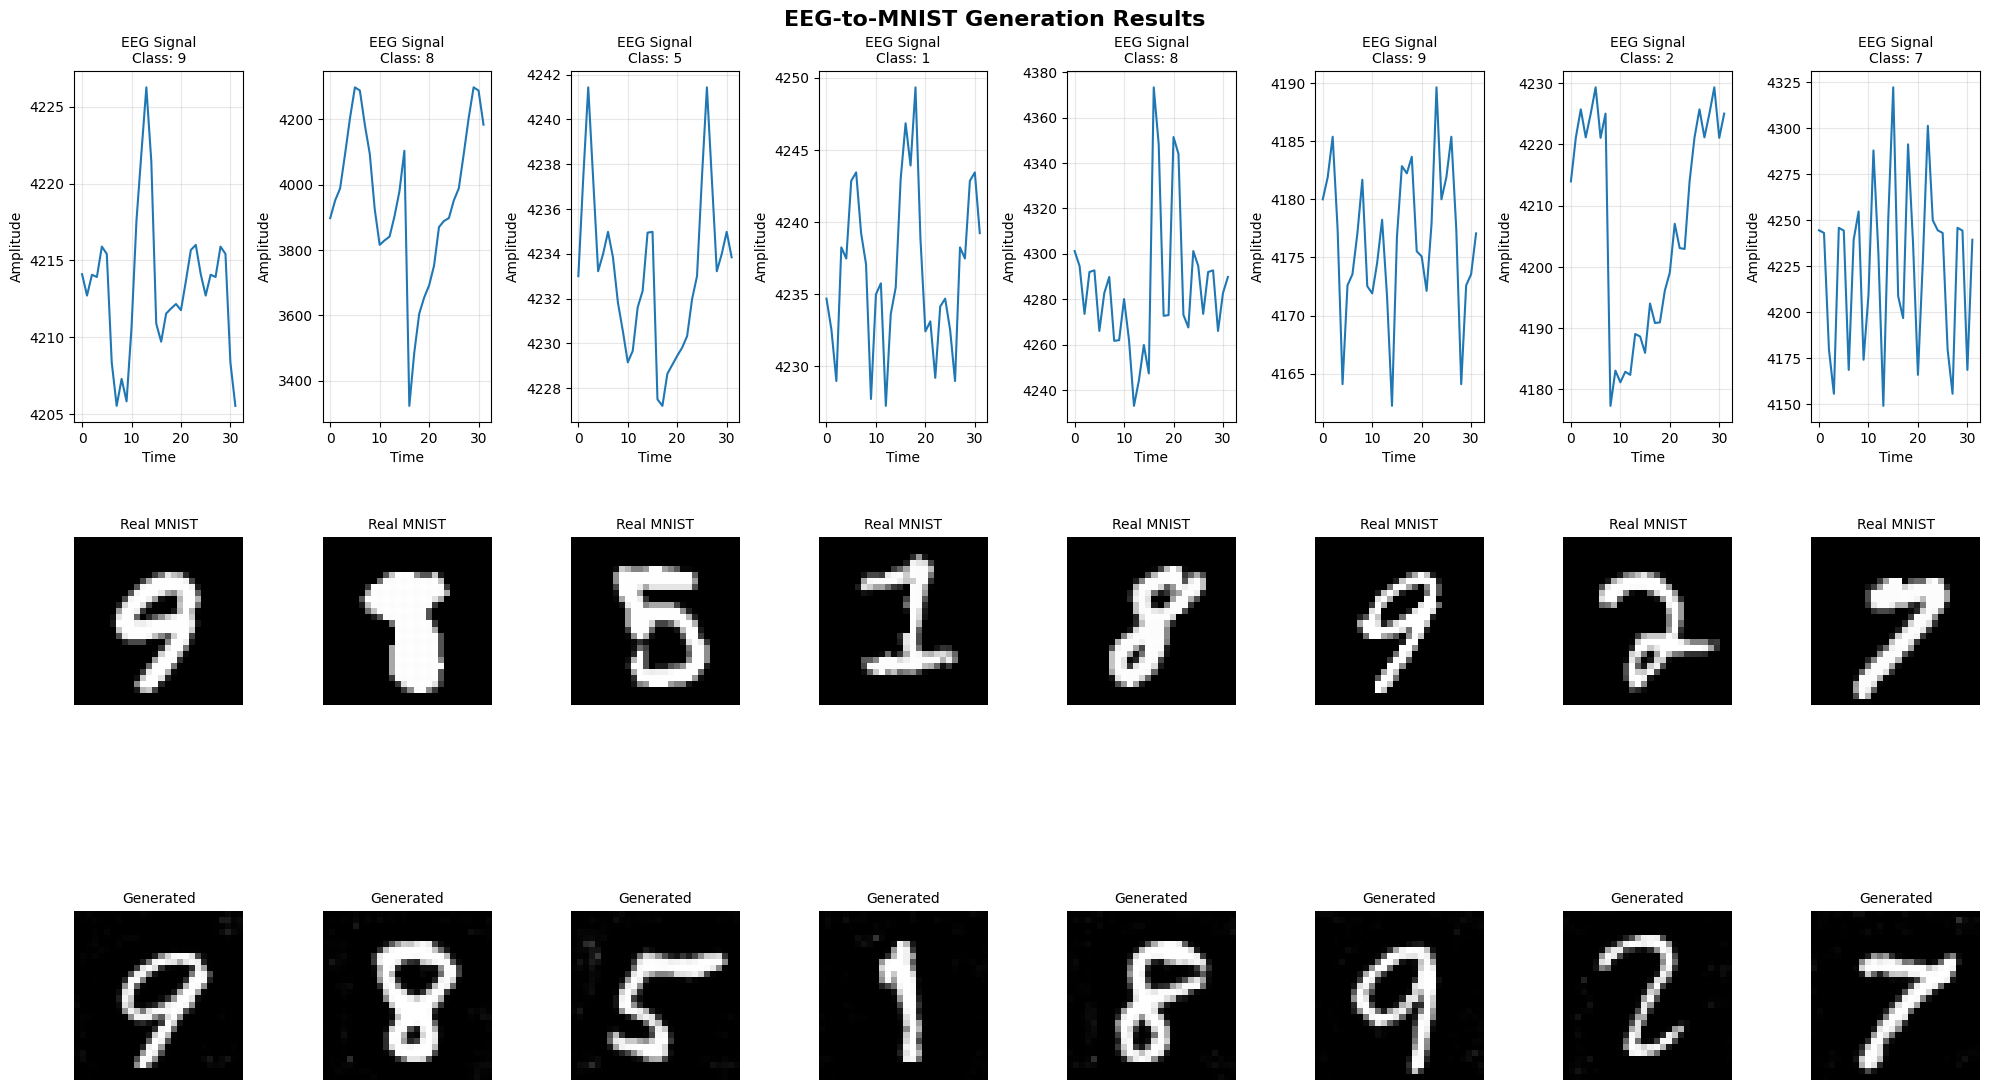

MNIST visualization saved as mnist_generated_samples.png


NameError: name 'ejne' is not defined

In [2]:
class SpectralNorm(nn.Module):
    """Spectral Normalization wrapper"""
    def __init__(self, module, name='weight', power_iterations=1):
        super(SpectralNorm, self).__init__()
        self.module = module
        self.name = name
        self.power_iterations = power_iterations
        if not self._made_params():
            self._make_params()

    def _update_u_v(self):
        u = getattr(self.module, self.name + "_u")
        v = getattr(self.module, self.name + "_v")
        w = getattr(self.module, self.name + "_bar")

        height = w.data.shape[0]
        for _ in range(self.power_iterations):
            v.data = F.normalize(torch.mv(torch.t(w.view(height, -1).data), u.data), dim=0)
            u.data = F.normalize(torch.mv(w.view(height, -1).data, v.data), dim=0)

        sigma = u.dot(w.view(height, -1).mv(v))
        setattr(self.module, self.name, w / sigma.expand_as(w))

    def _made_params(self):
        try:
            u = getattr(self.module, self.name + "_u")
            v = getattr(self.module, self.name + "_v")
            w = getattr(self.module, self.name + "_bar")
            return True
        except AttributeError:
            return False

    def _make_params(self):
        w = getattr(self.module, self.name)
        height = w.data.shape[0]
        width = w.view(height, -1).data.shape[1]

        u = nn.Parameter(w.data.new(height).normal_(0, 1), requires_grad=False)
        v = nn.Parameter(w.data.new(width).normal_(0, 1), requires_grad=False)
        u.data = F.normalize(u.data, dim=0)
        v.data = F.normalize(v.data, dim=0)
        w_bar = nn.Parameter(w.data)

        del self.module._parameters[self.name]
        self.module.register_parameter(self.name + "_u", u)
        self.module.register_parameter(self.name + "_v", v)
        self.module.register_parameter(self.name + "_bar", w_bar)

    def forward(self, *args):
        self._update_u_v()
        return self.module.forward(*args)

def spectral_norm(module, name='weight', power_iterations=1):
    return SpectralNorm(module, name, power_iterations)

# Image Encoder for Contrastive Learning
class ImageEncoder(nn.Module):
    """Encode MNIST images (28x28 grayscale) to latent features for contrastive learning"""
    def __init__(self, latent_dim=512):
        super(ImageEncoder, self).__init__()
        
        # CNN layers for MNIST (28x28 grayscale)
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),  # 1 channel for grayscale
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 14x14
            
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 7x7
            
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((4, 4))  # 4x4
        )
        
        # Projection head for contrastive learning
        self.projection_head = nn.Sequential(
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, latent_dim)
        )
    
    def forward(self, x):
        # x shape: (batch_size, 1, 28, 28)
        features = self.conv_layers(x)
        features = features.view(features.size(0), -1)  # Flatten
        projected = self.projection_head(features)
        return F.normalize(projected, dim=1)  # L2 normalize for contrastive learning



class EEGEncoder(nn.Module):
    """Modified EEG Encoder for shape (batch, 14, 32, 1)"""
    def __init__(self, input_channels=14, sequence_length=32, latent_dim=512):
        super(EEGEncoder, self).__init__()
        
        # Conv1D layers for channel processing
        self.conv1 = nn.Conv1d(input_channels, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        
        # LSTM layers for temporal processing
        self.lstm1 = nn.LSTM(256, 128, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(256, 64, batch_first=True, bidirectional=True)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * sequence_length, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, latent_dim)
        
        # Projection head for contrastive learning
        self.contrastive_head = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, latent_dim)
        )
        
        self.dropout = nn.Dropout(0.3)
        self.leaky_relu = nn.LeakyReLU(0.2)
        
    def forward(self, x, return_contrastive=False):
        # x shape: (batch_size, 14, 32, 1) -> (batch_size, 14, 32)
        x = x.squeeze(-1)  # Remove the last dimension
        
        # Apply 1D convolutions along the time dimension
        x = self.leaky_relu(self.conv1(x))  # (batch, 64, 32)
        x = self.dropout(x)
        x = self.leaky_relu(self.conv2(x))  # (batch, 128, 32)
        x = self.dropout(x)
        x = self.leaky_relu(self.conv3(x))  # (batch, 256, 32)
        
        # Transpose for LSTM: (batch, seq_len, features)
        x = x.transpose(1, 2)  # (batch, 32, 256)
        
        # LSTM processing
        x, _ = self.lstm1(x)
        x = self.dropout(x)
        x, _ = self.lstm2(x)
        
        # Flatten and process through FC layers
        x = x.flatten(1)
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.dropout(x)
        features = self.fc3(x)
        
        if return_contrastive:
            # Return both generator features and contrastive features
            contrastive_features = self.contrastive_head(features)
            contrastive_features = F.normalize(contrastive_features, dim=1)
            return features, contrastive_features
        
        return features

class Generator(nn.Module):
    """Modified Generator for MNIST - outputs 28x28 grayscale images"""
    def __init__(self, eeg_dim=512, noise_dim=100, n_classes=10):
        super(Generator, self).__init__()
        
        # Class embedding
        self.class_embedding = nn.Embedding(n_classes, 50)
        
        # Combine EEG features, noise, and class
        input_dim = eeg_dim + noise_dim + 50
        
        # Initial projection to smaller size for MNIST
        self.fc = nn.Linear(input_dim, 7 * 7 * 256)
        
        # Transposed convolution layers for MNIST
        self.convt1 = spectral_norm(nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False))
        self.bn1 = nn.BatchNorm2d(128)
        
        self.convt2 = spectral_norm(nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False))
        self.bn2 = nn.BatchNorm2d(64)
        
        # Final layer outputs 1 channel (grayscale)
        self.convt3 = spectral_norm(nn.ConvTranspose2d(64, 1, 3, 1, 1, bias=False))
        
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.tanh = nn.Tanh()
        
    def forward(self, eeg_features, noise, class_labels):
        # Embed class labels
        class_emb = self.class_embedding(class_labels)
        
        # Combine all inputs
        x = torch.cat([eeg_features, noise, class_emb], dim=1)
        
        # Initial projection and reshape
        x = self.fc(x)
        x = x.view(-1, 256, 7, 7)
        
        # Transposed convolutions
        x = self.leaky_relu(self.bn1(self.convt1(x)))  # 14x14
        x = self.leaky_relu(self.bn2(self.convt2(x)))  # 28x28
        x = self.tanh(self.convt3(x))                   # 28x28x1
        
        return x

class Discriminator(nn.Module):
    """Modified Discriminator for MNIST - processes 28x28 grayscale images"""
    def __init__(self, n_classes=10):
        super(Discriminator, self).__init__()
        
        # Class embedding
        self.class_embedding = nn.Embedding(n_classes, 50)
        self.class_projection = nn.Linear(50, 28 * 28)
        
        # Convolutional layers - 2 channels (1 grayscale + 1 class)
        self.conv1 = nn.Conv2d(2, 64, 3, 2, 1, bias=False)  # 14x14
        self.conv2 = nn.Conv2d(64, 128, 3, 2, 1, bias=False)  # 7x7
        self.bn2 = nn.BatchNorm2d(128)
        
        self.conv3 = nn.Conv2d(128, 256, 3, 2, 1, bias=False)  # 3x3
        self.bn3 = nn.BatchNorm2d(256)
        
        self.conv4 = nn.Conv2d(256, 1, 3, 1, 1, bias=False)  # 3x3
        
        self.leaky_relu = nn.LeakyReLU(0.2)
        
    def forward(self, x, class_labels):
        batch_size = x.size(0)
        
        # Embed and project class labels
        class_emb = self.class_embedding(class_labels)
        class_map = self.class_projection(class_emb)
        class_map = class_map.view(batch_size, 1, 28, 28)
        
        # Concatenate image with class map
        x = torch.cat([x, class_map], dim=1)
        
        # Convolutional layers
        x = self.leaky_relu(self.conv1(x))
        x = self.leaky_relu(self.bn2(self.conv2(x)))
        x = self.leaky_relu(self.bn3(self.conv3(x)))
        x = self.conv4(x)
        
        return x.view(batch_size, -1).mean(dim=1)

# Contrastive Loss Functions
def info_nce_loss(eeg_features, img_features, temperature=0.07):
    """
    InfoNCE loss for contrastive learning
    """
    batch_size = eeg_features.size(0)
    
    # Compute similarity matrix
    similarity_matrix = torch.matmul(eeg_features, img_features.T) / temperature
    
    # Labels for positive pairs (diagonal elements)
    labels = torch.arange(batch_size).to(eeg_features.device)
    
    # Compute InfoNCE loss
    loss = F.cross_entropy(similarity_matrix, labels)
    
    return loss

def triplet_loss(anchor, positive, negative, margin=1.0):
    """
    Triplet loss for contrastive learning
    """
    pos_dist = F.pairwise_distance(anchor, positive)
    neg_dist = F.pairwise_distance(anchor, negative)
    
    loss = F.relu(pos_dist - neg_dist + margin)
    return loss.mean()

class EEGMNISTDataset(Dataset):
    """Dataset combining EEG data with MNIST images"""
    def __init__(self, eeg_pickle_path, train=True, transform=None):
        # Load EEG data from pickle file
        with open(eeg_pickle_path, 'rb') as f:
            data_dict = pickle.load(f, encoding='latin1')
        
        if train:
            self.eeg_data = data_dict['x_train']  # Shape: (45390, 14, 32, 1)
            self.eeg_labels = data_dict['y_train']  # Shape: (45390, 10) - one-hot encoded
        else:
            self.eeg_data = data_dict['x_test']
            self.eeg_labels = data_dict['y_test']
        
        # Convert one-hot labels to class indices
        self.class_labels = np.argmax(self.eeg_labels, axis=1)
        
        # Load MNIST dataset
        from torchvision.datasets import MNIST
        
        mnist_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
        ])
        
        self.mnist_dataset = MNIST(
            root='./mnist_data', 
            train=train, 
            download=True, 
            transform=mnist_transform
        )
        
        # Group MNIST images by class for contrastive learning
        self.class_to_mnist_images = {i: [] for i in range(10)}
        for idx, (_, label) in enumerate(self.mnist_dataset):
            self.class_to_mnist_images[label].append(idx)
        
        self.transform = transform
        
        print(f"Dataset: {len(self.eeg_data)} EEG samples, {len(self.mnist_dataset)} MNIST images")
        print(f"EEG shape: {self.eeg_data.shape}")
        print(f"EEG labels shape: {self.eeg_labels.shape}")
        
    def __len__(self):
        return len(self.eeg_data)
    
    def __getitem__(self, idx):
        # Get EEG data and its class
        eeg = torch.FloatTensor(self.eeg_data[idx])  # Shape: (14, 32, 1)
        eeg_class = self.class_labels[idx]
        
        # Get corresponding MNIST image from the same class
        if len(self.class_to_mnist_images[eeg_class]) > 0:
            mnist_idx = random.choice(self.class_to_mnist_images[eeg_class])
        else:
            # Fallback to random MNIST image
            mnist_idx = random.randint(0, len(self.mnist_dataset) - 1)
            
        mnist_image, mnist_label = self.mnist_dataset[mnist_idx]
        
        # For contrastive learning, get a negative sample
        available_classes = [c for c in range(10) if c != mnist_label and len(self.class_to_mnist_images[c]) > 0]
        if available_classes:
            negative_class = random.choice(available_classes)
            negative_mnist_idx = random.choice(self.class_to_mnist_images[negative_class])
        else:
            # Fallback: use a random different MNIST image
            negative_mnist_idx = random.choice([i for i in range(len(self.mnist_dataset)) 
                                              if self.mnist_dataset[i][1] != mnist_label])
        
        negative_mnist_image, _ = self.mnist_dataset[negative_mnist_idx]
        
        return eeg, mnist_image, negative_mnist_image, torch.LongTensor([mnist_label])



def load_test_data(eeg_pickle_path):
    """Load test data separately"""
    with open(eeg_pickle_path, 'rb') as f:
        data_dict = pickle.load(f, encoding='latin1')
    
    x_test = data_dict['x_test']  # Shape: (5706, 14, 32, 1)
    y_test = data_dict['y_test']  # Shape: (5706, 10)
    test_class_labels = np.argmax(y_test, axis=1)
    
    return x_test, test_class_labels
# Loss functions
def discriminator_hinge_loss(real_output, fake_output):
    real_loss = torch.mean(F.relu(1.0 - real_output))
    fake_loss = torch.mean(F.relu(1.0 + fake_output))
    return (real_loss + fake_loss) / 2.0

def generator_hinge_loss(fake_output):
    return -torch.mean(fake_output)

def diff_augment(x, policy="color,translation"):
    """Simple data augmentation"""
    if "color" in policy:
        # Color jittering
        x = x + torch.randn_like(x) * 0.1
        x = torch.clamp(x, -1, 1)
    
    if "translation" in policy:
        # Random translation
        if random.random() > 0.5:
            shift = random.randint(-4, 4)
            x = torch.roll(x, shift, dims=2)
            x = torch.roll(x, shift, dims=3)
    
    return x

# Modified training function with contrastive learning
def train_gan_with_mnist(eeg_pickle_path, num_epochs=100, batch_size=32, lr=0.0002):
    # Create dataset and dataloader
    dataset = EEGMNISTDataset(eeg_pickle_path, train=True)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    
    # Initialize models
    eeg_encoder = EEGEncoder(input_channels=14, sequence_length=32).to(device)
    image_encoder = ImageEncoder().to(device)  # Modified for MNIST
    generator = Generator(n_classes=10).to(device)  # Modified for MNIST
    discriminator = Discriminator(n_classes=10).to(device)  # Modified for MNIST
    
    # Optimizers
    contrastive_optimizer = optim.Adam(
        list(eeg_encoder.parameters()) + list(image_encoder.parameters()), 
        lr=lr, betas=(0.9, 0.999)
    )
    g_optimizer = optim.Adam(
        list(eeg_encoder.parameters()) + list(generator.parameters()), 
        lr=lr, betas=(0.0, 0.9)
    )
    d_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.0, 0.9))
    
    # Training tracking
    contrastive_losses = []
    g_losses = []
    d_losses = []
    
    print("Starting training with MNIST dataset...")
    
    for epoch in range(num_epochs):
        contrastive_loss_total = 0
        g_loss_total = 0
        d_loss_total = 0
        
        pbar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}')
        
        for batch_idx, (eeg_batch, real_images, negative_images, class_labels) in enumerate(pbar):
            batch_size_actual = eeg_batch.size(0)
            
            eeg_batch = eeg_batch.to(device)
            real_images = real_images.to(device)
            negative_images = negative_images.to(device)
            class_labels = class_labels.squeeze().to(device)
            
            # =============== Contrastive Learning Phase ===============
            contrastive_optimizer.zero_grad()
            
            # Get features for contrastive learning
            _, eeg_contrastive_features = eeg_encoder(eeg_batch, return_contrastive=True)
            img_contrastive_features = image_encoder(real_images)
            negative_img_features = image_encoder(negative_images)
            
            # Compute contrastive losses
            info_nce = info_nce_loss(eeg_contrastive_features, img_contrastive_features)
            triplet = triplet_loss(eeg_contrastive_features, img_contrastive_features, negative_img_features)
            
            contrastive_loss = info_nce + 0.5 * triplet
            contrastive_loss.backward()
            contrastive_optimizer.step()
            
            # =============== GAN Training Phase ===============
            # Generate noise
            noise = torch.randn(batch_size_actual, 100).to(device)
            
            # Train Discriminator
            d_optimizer.zero_grad()
            
            # Encode EEG to features (detach to prevent gradients from flowing to contrastive learning)
            eeg_features = eeg_encoder(eeg_batch).detach()
            
            # Generate fake images
            fake_images = generator(eeg_features, noise, class_labels)
            
            # Apply data augmentation (modified for grayscale)
            real_images_aug = diff_augment_mnist(real_images)
            fake_images_aug = diff_augment_mnist(fake_images.detach())
            
            # Discriminator predictions
            real_output = discriminator(real_images_aug, class_labels)
            fake_output = discriminator(fake_images_aug, class_labels)
            
            # Discriminator loss
            d_loss = discriminator_hinge_loss(real_output, fake_output)
            d_loss.backward()
            d_optimizer.step()
            
            # Train Generator
            g_optimizer.zero_grad()
            
            # Generate new fake images for generator training
            noise2 = torch.randn(batch_size_actual, 100).to(device)
            eeg_features = eeg_encoder(eeg_batch)
            fake_images = generator(eeg_features, noise, class_labels)
            fake_images2 = generator(eeg_features, noise2, class_labels)
            
            # Apply augmentation
            fake_images_aug = diff_augment_mnist(fake_images)
            fake_images2_aug = diff_augment_mnist(fake_images2)
            
            # Discriminator predictions on fake images
            fake_output = discriminator(fake_images_aug, class_labels)
            fake_output2 = discriminator(fake_images2_aug, class_labels)
            
            # Generator loss with mode collapse prevention
            g_loss = generator_hinge_loss(fake_output) + generator_hinge_loss(fake_output2)
            
            # Mode seeking loss
            mode_loss = torch.mean(torch.abs(fake_images2 - fake_images)) / (
                torch.mean(torch.abs(noise2 - noise)) + 1e-5)
            mode_loss = 1.0 / (mode_loss + 1e-5)
            
            # Feature alignment loss (align generated features with image features)
            with torch.no_grad():
                real_img_features = image_encoder(real_images)
            fake_img_features = image_encoder(fake_images)
            alignment_loss = F.mse_loss(fake_img_features, real_img_features)
            
            total_g_loss = g_loss + 1.0 * mode_loss + 0.1 * alignment_loss
            total_g_loss.backward()
            g_optimizer.step()
            
            # Update tracking
            contrastive_loss_total += contrastive_loss.item()
            g_loss_total += total_g_loss.item()
            d_loss_total += d_loss.item()
            
            pbar.set_postfix({
                'Cont_Loss': f'{contrastive_loss_total/(batch_idx+1):.4f}',
                'G_Loss': f'{g_loss_total/(batch_idx+1):.4f}',
                'D_Loss': f'{d_loss_total/(batch_idx+1):.4f}'
            })
        
        # Save sample images every 10 epochs
        if (epoch + 1) % 10 == 0:
            with torch.no_grad():
                sample_eeg = eeg_batch[:8]
                sample_noise = torch.randn(8, 100).to(device)
                sample_classes = class_labels[:8]
                sample_features = eeg_encoder(sample_eeg)
                sample_images = generator(sample_features, sample_noise, sample_classes)
                
                # Save sample images (grayscale)
                plt.figure(figsize=(12, 8))
                for i in range(8):
                    plt.subplot(2, 4, i+1)
                    img = sample_images[i].cpu().squeeze()  # Remove channel dimension
                    img = (img + 1) / 2  # Denormalize
                    img = torch.clamp(img, 0, 1)
                    plt.imshow(img, cmap='gray')
                    plt.axis('off')
                    plt.title(f'Class: {sample_classes[i].item()}')
                
                plt.tight_layout()
                plt.savefig(f'mnist_generated_samples_epoch_{epoch+1}.png')
                plt.close()
        
        # Store epoch losses
        contrastive_losses.append(contrastive_loss_total/len(dataloader))
        g_losses.append(g_loss_total/len(dataloader))
        d_losses.append(d_loss_total/len(dataloader))
        
        print(f'Epoch {epoch+1}: Contrastive_Loss = {contrastive_loss_total/len(dataloader):.4f}, '
              f'G_Loss = {g_loss_total/len(dataloader):.4f}, '
              f'D_Loss = {d_loss_total/len(dataloader):.4f}')
    
    # Plot training history
    plot_training_history_with_contrastive(contrastive_losses, g_losses, d_losses)
    
    return eeg_encoder, image_encoder, generator, discriminator


# Modified data augmentation for grayscale images
def diff_augment_mnist(x, policy="color,translation"):
    """Simple data augmentation for grayscale MNIST images"""
    if "color" in policy:
        # Brightness jittering for grayscale
        x = x + torch.randn_like(x) * 0.05
        x = torch.clamp(x, -1, 1)
    
    if "translation" in policy:
        # Random translation
        if random.random() > 0.5:
            shift = random.randint(-2, 2)  # Smaller shifts for 28x28 images
            x = torch.roll(x, shift, dims=2)
            x = torch.roll(x, shift, dims=3)
    
    return x


# Modified visualization function for MNIST
def visualize_mnist_samples(eeg_encoder, generator, dataset, num_samples=8, save_path='mnist_generated_samples.png'):
    """
    Visualize generated MNIST images from EEG signals alongside real images
    """
    eeg_encoder.eval()
    generator.eval()
    
    # Get random samples from dataset
    indices = random.sample(range(len(dataset)), num_samples)
    
    fig, axes = plt.subplots(3, num_samples, figsize=(20, 12))
    fig.suptitle('EEG-to-MNIST Generation Results', fontsize=16, fontweight='bold')
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            eeg_sample, real_image, _, class_label = dataset[idx]
            
            # Prepare inputs
            eeg_batch = eeg_sample.unsqueeze(0).to(device)
            class_batch = class_label.to(device)
            noise = torch.randn(1, 100).to(device)
            
            # Generate image
            eeg_features = eeg_encoder(eeg_batch)
            generated_image = generator(eeg_features, noise, class_batch)
            
            # Convert tensors to displayable format
            real_img = (real_image.squeeze() + 1) / 2  # Denormalize and remove channel dim
            real_img = torch.clamp(real_img, 0, 1)
            
            gen_img = (generated_image.squeeze().cpu() + 1) / 2
            gen_img = torch.clamp(gen_img, 0, 1)
            
            # Display EEG signal (average across channels for visualization)
            eeg_plot = eeg_sample.mean(dim=0).squeeze().numpy()
            
            # Plot EEG signal
            axes[0, i].plot(eeg_plot)
            axes[0, i].set_title(f'EEG Signal\nClass: {class_label.item()}', fontsize=10)
            axes[0, i].set_xlabel('Time')
            axes[0, i].set_ylabel('Amplitude')
            axes[0, i].grid(True, alpha=0.3)
            
            # Plot real MNIST image
            axes[1, i].imshow(real_img, cmap='gray')
            axes[1, i].set_title('Real MNIST', fontsize=10)
            axes[1, i].axis('off')
            
            # Plot generated image
            axes[2, i].imshow(gen_img, cmap='gray')
            axes[2, i].set_title('Generated', fontsize=10)
            axes[2, i].axis('off')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"MNIST visualization saved as {save_path}")

def visualize_generated_samples(eeg_encoder, generator, dataset, num_samples=8, save_path='generated_samples.png'):
    """
    Visualize generated images from EEG signals alongside real images
    """
    eeg_encoder.eval()
    generator.eval()
    
    # Get random samples from dataset
    indices = random.sample(range(len(dataset)), num_samples)
    
    fig, axes = plt.subplots(3, num_samples, figsize=(20, 12))
    fig.suptitle('EEG-to-Image Generation Results with Contrastive Learning', fontsize=16, fontweight='bold')
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            eeg_sample, real_image, _, class_label = dataset[idx]
            
            # Prepare inputs
            eeg_batch = eeg_sample.unsqueeze(0).to(device)
            class_batch = class_label.to(device)
            noise = torch.randn(1, 100).to(device)
            
            # Generate image
            eeg_features = eeg_encoder(eeg_batch)
            generated_image = generator(eeg_features, noise, class_batch)
            
            # Convert tensors to displayable format
            real_img = (real_image + 1) / 2  # Denormalize from [-1, 1] to [0, 1]
            real_img = torch.clamp(real_img, 0, 1)
            
            gen_img = (generated_image.squeeze().cpu() + 1) / 2
            gen_img = torch.clamp(gen_img, 0, 1)
            
            # Display EEG signal (average across channels for visualization)
            eeg_plot = eeg_sample.mean(dim=0).mean(dim=0).numpy()  # Average across trials and channels
            
            # Plot EEG signal
            axes[0, i].plot(eeg_plot)
            axes[0, i].set_title(f'EEG Signal\nClass: {class_label.item()}', fontsize=10)
            axes[0, i].set_xlabel('Time')
            axes[0, i].set_ylabel('Amplitude')
            axes[0, i].grid(True, alpha=0.3)
            
            # Plot real image
            axes[1, i].imshow(real_img.permute(1, 2, 0))
            axes[1, i].set_title('Real Image', fontsize=10)
            axes[1, i].axis('off')
            
            # Plot generated image
            axes[2, i].imshow(gen_img.permute(1, 2, 0))
            axes[2, i].set_title('Generated Image', fontsize=10)
            axes[2, i].axis('off')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"Visualization saved as {save_path}")

def plot_training_history_with_contrastive(contrastive_losses, g_losses, d_losses, save_path='training_history.png'):
    """
    Plot training loss history including contrastive loss
    """
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(contrastive_losses, label='Contrastive Loss', color='green')
    plt.title('Contrastive Learning Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 3, 2)
    plt.plot(g_losses, label='Generator Loss', color='blue')
    plt.plot(d_losses, label='Discriminator Loss', color='red')
    plt.title('GAN Training Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 3, 3)
    # Smooth the curves using moving average
    window = max(1, len(g_losses) // 20)
    cont_smooth = np.convolve(contrastive_losses, np.ones(window)/window, mode='valid')
    g_smooth = np.convolve(g_losses, np.ones(window)/window, mode='valid')
    d_smooth = np.convolve(d_losses, np.ones(window)/window, mode='valid')
    
    plt.plot(cont_smooth, label='Contrastive Loss (Smoothed)', color='green')
    plt.plot(g_smooth, label='Generator Loss (Smoothed)', color='blue')
    plt.plot(d_smooth, label='Discriminator Loss (Smoothed)', color='red')
    plt.title('Smoothed Training Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"Training history saved as {save_path}")

def evaluate_contrastive_alignment(eeg_encoder, image_encoder, dataset, num_samples=100):
    """
    Evaluate how well EEG features align with image features
    """
    eeg_encoder.eval()
    image_encoder.eval()
    
    similarities = []
    
    with torch.no_grad():
        for i in range(min(num_samples, len(dataset))):
            eeg_sample, real_image, _, class_label = dataset[i]
            
            # Get features
            eeg_batch = eeg_sample.unsqueeze(0).to(device)
            img_batch = real_image.unsqueeze(0).to(device)
            
            _, eeg_features = eeg_encoder(eeg_batch, return_contrastive=True)
            img_features = image_encoder(img_batch)
            
            # Compute cosine similarity
            similarity = F.cosine_similarity(eeg_features, img_features, dim=1)
            similarities.append(similarity.item())
    
    avg_similarity = np.mean(similarities)
    std_similarity = np.std(similarities)
    
    print(f"Average EEG-Image similarity: {avg_similarity:.4f} ± {std_similarity:.4f}")
    
    # Plot similarity distribution
    plt.figure(figsize=(10, 6))
    plt.hist(similarities, bins=20, alpha=0.7, edgecolor='black')
    plt.axvline(avg_similarity, color='red', linestyle='--', 
                label=f'Mean: {avg_similarity:.4f}')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.title('Distribution of EEG-Image Feature Similarities')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('similarity_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return avg_similarity, similarities





if __name__ == "__main__":
    eeg_pickle_path = "/kaggle/input/thoughtviz/data/data/eeg/digit/data.pkl"
    
    # Train with MNIST
    eeg_encoder, image_encoder, generator, discriminator = train_gan_with_mnist(
        eeg_pickle_path=eeg_pickle_path,
        num_epochs=50,
        batch_size=64,
        lr=0.0002
    )
    
    # Visualize results
    dataset = EEGMNISTDataset(eeg_pickle_path, train=True)
    visualize_mnist_samples(eeg_encoder, generator, dataset, num_samples=8)

ejne

if __name__ == "__main__":
    # Paths to your data
    eeg_pickle_path = "/kaggle/input/thoughtviz/data/data/eeg/image/data.pkl"  # Your pickle file
    images_dir = "/kaggle/input/thoughtviz/images/images/ImageNet-Filtered"      # Directory with 10 class folders
    
    print("Training EEG-to-Image GAN with your dataset...")
    print("="*60)
    
    # Train the model
    eeg_encoder, image_encoder, generator, discriminator = train_gan_with_contrastive_modified(
        eeg_pickle_path=eeg_pickle_path,
        images_dir=images_dir,
        num_epochs=2,
        batch_size=64,
        lr=0.0002
    )
    dataset = EEGImageDataset(eeg_pickle_path, images_dir)
    visualize_generated_samples(eeg_encoder, generator, dataset, num_samples=8)

dsjdjn
# Example usage
if __name__ == "__main__":
    # Paths to your data
    eeg_file_path = "/kaggle/input/dongyangli-deleeg-image-decode/sub-01/sub-01/preprocessed_eeg_training.npy"
    images_dir = "/kaggle/input/dongyangli-deleeg-image-decode/osfstorage-archive/training_images/training_images"
    
    print("Training EEG-to-Image GAN with Contrastive Learning...")
    print("="*60)
    
    # Train the model with contrastive learning
    eeg_encoder, image_encoder, generator, discriminator = train_gan_with_contrastive(
        eeg_file_path=eeg_file_path,
        images_dir=images_dir,
        num_epochs=3,  # Reduced for faster training, increase for better results
        batch_size=32,  # Adjust based on your GPU memory
        lr=0.002
    )
    
    # Save trained models
    torch.save({
        'eeg_encoder': eeg_encoder.state_dict(),
        'image_encoder': image_encoder.state_dict(),
        'generator': generator.state_dict(),
        'discriminator': discriminator.state_dict()
    }, 'eeg_to_image_gan_contrastive.pth')
    
    print("\nTraining completed and models saved!")
    
    # Create dataset for evaluation
    dataset = EEGImageDataset(eeg_file_path, images_dir)
    
    # Evaluate contrastive alignment
    print("\nEvaluating EEG-Image feature alignment...")
    avg_similarity, similarities = evaluate_contrastive_alignment(
        eeg_encoder, image_encoder, dataset, num_samples=200
    )
    
    # Visualize results
    print("\nGenerating visualizations...")
    visualize_generated_samples(eeg_encoder, generator, dataset, num_samples=8)
    
    print("All tasks completed successfully!")
    print(f"Average feature alignment score: {avg_similarity:.4f}")
    
    # Additional analysis: visualize feature space
    def visualize_feature_space(eeg_encoder, image_encoder, dataset, num_samples=500):
        """
        Visualize EEG and image features in 2D using t-SNE
        """
        from sklearn.manifold import TSNE
        import matplotlib.colors as mcolors
        
        eeg_encoder.eval()
        image_encoder.eval()
        
        eeg_features_list = []
        img_features_list = []
        labels_list = []
        
        with torch.no_grad():
            for i in range(min(num_samples, len(dataset))):
                eeg_sample, real_image, _, class_label = dataset[i]
                
                eeg_batch = eeg_sample.unsqueeze(0).to(device)
                img_batch = real_image.unsqueeze(0).to(device)
                
                _, eeg_features = eeg_encoder(eeg_batch, return_contrastive=True)
                img_features = image_encoder(img_batch)
                
                eeg_features_list.append(eeg_features.cpu().numpy())
                img_features_list.append(img_features.cpu().numpy())
                labels_list.append(class_label.item())
        
        # Combine features
        eeg_features_array = np.vstack(eeg_features_list)
        img_features_array = np.vstack(img_features_list)
        all_features = np.vstack([eeg_features_array, img_features_array])
        
        # Create labels for visualization
        feature_types = ['EEG'] * len(eeg_features_array) + ['Image'] * len(img_features_array)
        class_labels = labels_list + labels_list
        
        # Apply t-SNE
        print("Computing t-SNE embedding...")
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        features_2d = tsne.fit_transform(all_features)
        
        # Plot
        plt.figure(figsize=(12, 8))
        
        # Get unique classes (limit to avoid overcrowding)
        unique_classes = sorted(list(set(class_labels)))[:20]  # Limit to 20 classes
        colors = plt.cm.tab20(np.linspace(0, 1, len(unique_classes)))
        
        for i, class_id in enumerate(unique_classes):
            # EEG features
            eeg_mask = np.array([(ft == 'EEG' and cl == class_id) 
                                for ft, cl in zip(feature_types, class_labels)])
            if np.any(eeg_mask):
                plt.scatter(features_2d[eeg_mask, 0], features_2d[eeg_mask, 1], 
                           c=[colors[i]], marker='o', s=50, alpha=0.6, 
                           label=f'EEG Class {class_id}' if i < 5 else "")
            
            # Image features
            img_mask = np.array([(ft == 'Image' and cl == class_id) 
                                for ft, cl in zip(feature_types, class_labels)])
            if np.any(img_mask):
                plt.scatter(features_2d[img_mask, 0], features_2d[img_mask, 1], 
                           c=[colors[i]], marker='^', s=50, alpha=0.6,
                           label=f'Image Class {class_id}' if i < 5 else "")
        
        plt.title('t-SNE Visualization of EEG and Image Features\n(Circles: EEG, Triangles: Images)')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig('feature_space_visualization.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("Feature space visualization saved as 'feature_space_visualization.png'")
    
    # Visualize feature space (optional - requires scikit-learn)
    try:
        print("\nVisualizing feature space...")
        visualize_feature_space(eeg_encoder, image_encoder, dataset, num_samples=300)
    except ImportError:
        print("Scikit-learn not available. Skipping feature space visualization.")
    except Exception as e:
        print(f"Feature space visualization failed: {e}")
    
    print("\n" + "="*60)
    print("SUMMARY:")
    print("="*60)
    print("✓ Contrastive learning implemented with InfoNCE and Triplet loss")
    print("✓ EEG and Image encoders trained to align features")
    print("✓ GAN training enhanced with feature alignment loss")
    print("✓ Models saved and evaluation completed")
    print(f"✓ Feature alignment score: {avg_similarity:.4f}")
    print("="*60)